<a href="https://colab.research.google.com/github/KyshanNeheeth-Peruru/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

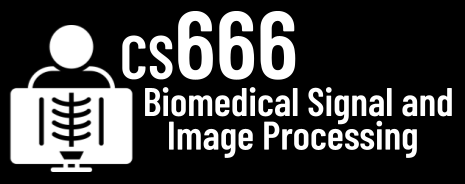

# Assignment 1

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [3]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.3 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [4]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [8]:
from pylab import *
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

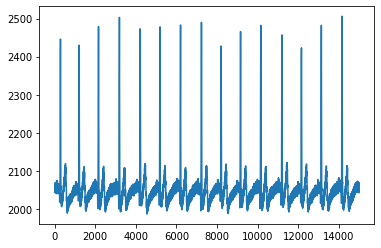

In [9]:
plt.plot(signal)

In [10]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

In [11]:
size(signal)

15000

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [12]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 15 ### TODO!

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [13]:
### TODO
from biosppy.signals import ecg
psignal = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

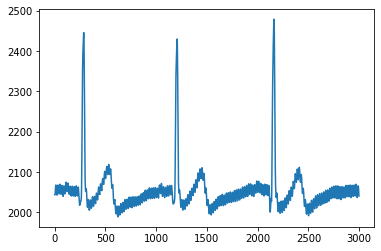

In [14]:
### TODO plot unfiltered signal
uf_3_signal=signal[0:3*SAMPLING_RATE]
plt.plot(uf_3_signal)
### Yes, P,Q,R,S,T waves rough locations can be spotted

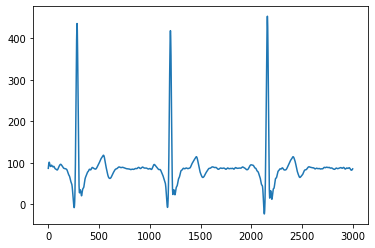

In [15]:
### TODO plot filtered signal
f_3_signal=psignal['filtered'][0:3*SAMPLING_RATE]
plt.plot(f_3_signal)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

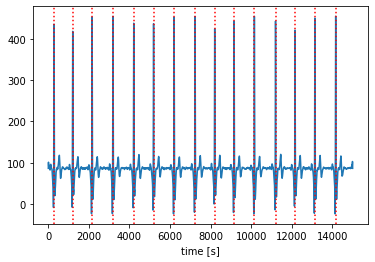

In [16]:
from matplotlib import pylab
### TODO
plot(psignal['filtered'])
pylab.xlabel("time [s]")
for i in psignal['rpeaks']:
  plt.axvline(x = i, color = 'r', ls=':')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [17]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.2 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


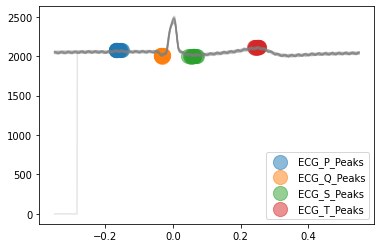

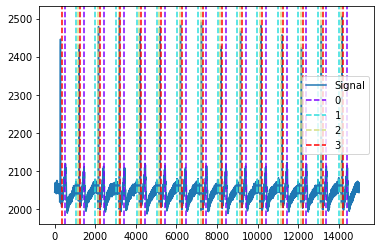

In [18]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
_, waves_peak = nk.ecg_delineate(signal, psignal['rpeaks'], sampling_rate=1000, method="peak",show=True,show_type='peaks')
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

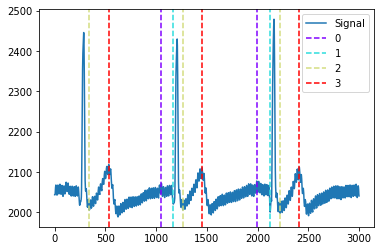

In [19]:
plot = nk.events_plot([waves_peak['ECG_P_Peaks'][:3], 
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3],
                       waves_peak['ECG_T_Peaks'][:3]], uf_3_signal)

In [ ]:
# TODO Does the detection work well?
# Yes it works well

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


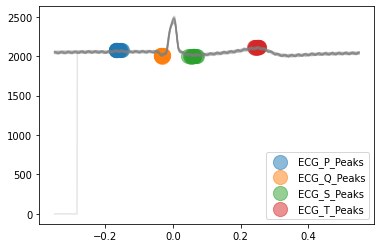

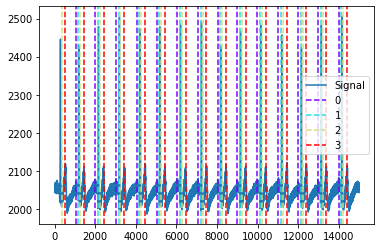

In [20]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(signal, psignal['rpeaks'], sampling_rate=1000, method="peak",show=True,show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_P_Peaks'], 
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks'],
                       waves_peak['ECG_T_Peaks']], signal)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


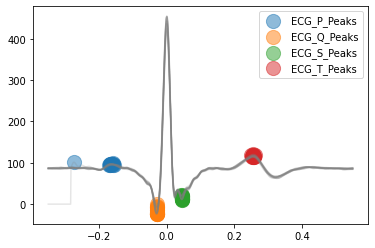

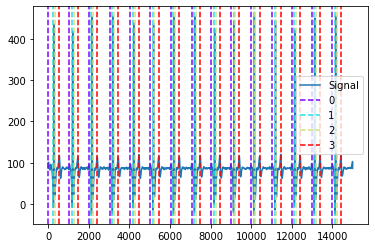

In [21]:
_, waves_peak = nk.ecg_delineate(psignal['filtered'], psignal['rpeaks'], sampling_rate=1000, method="peak",show=True,show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_P_Peaks'], 
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks'],
                       waves_peak['ECG_T_Peaks']], psignal['filtered'])

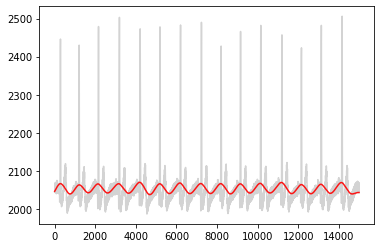

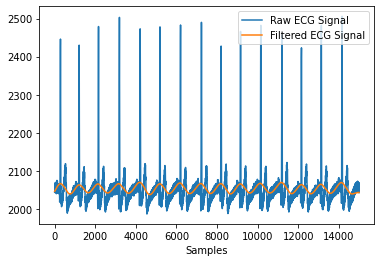

In [28]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filtered_signal = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=0.0, highcut=1.0, method='butterworth', show=True)
plot = nk.signal_plot([signal, filtered_signal], labels=['Raw ECG Signal', 'Filtered ECG Signal'])

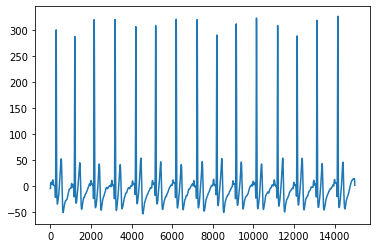

In [38]:
from neurokit2.ecg.ecg_process import ecg_clean
from neurokit2 import ecg_process
fil_signal=ecg_clean(signal, sampling_rate=1000, method='neurokit')
plt.plot(fil_signal)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


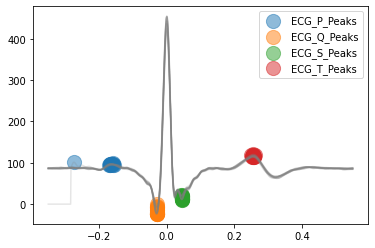

In [40]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(psignal['filtered'], psignal['rpeaks'], sampling_rate=1000, method="peak",show=True,show_type='peaks')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


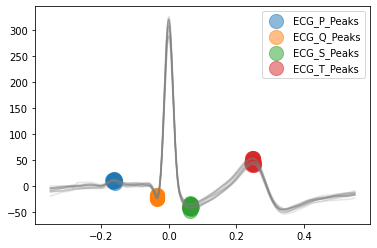

In [41]:
_, waves_peak = nk.ecg_delineate(fil_signal, psignal['rpeaks'], sampling_rate=1000, method="peak",show=True,show_type='peaks')

In [42]:
# TODO Which one works the best?
# It is clear and easier to spot peaks in filtered signal than unfiltered
# The filtered signal from biosspy looks much clearer to spot the peaks

In [43]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#